# Best Practices for NLP Data Preprocessing

Loading dependencies

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/swapnil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

Using TensorFlow backend.


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/swapnil/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/swapnil/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg

In [7]:
gbergSents = gutenberg.sents()

Preprocess sentence

In [8]:
gbergSents[4]

[u'She',
 u'was',
 u'the',
 u'youngest',
 u'of',
 u'the',
 u'two',
 u'daughters',
 u'of',
 u'a',
 u'most',
 u'affectionate',
 u',',
 u'indulgent',
 u'father',
 u';',
 u'and',
 u'had',
 u',',
 u'in',
 u'consequence',
 u'of',
 u'her',
 u'sister',
 u"'",
 u's',
 u'marriage',
 u',',
 u'been',
 u'mistress',
 u'of',
 u'his',
 u'house',
 u'from',
 u'a',
 u'very',
 u'early',
 u'period',
 u'.']

#### to lowercase

In [9]:
[w.lower() for w in gbergSents[4]]

[u'she',
 u'was',
 u'the',
 u'youngest',
 u'of',
 u'the',
 u'two',
 u'daughters',
 u'of',
 u'a',
 u'most',
 u'affectionate',
 u',',
 u'indulgent',
 u'father',
 u';',
 u'and',
 u'had',
 u',',
 u'in',
 u'consequence',
 u'of',
 u'her',
 u'sister',
 u"'",
 u's',
 u'marriage',
 u',',
 u'been',
 u'mistress',
 u'of',
 u'his',
 u'house',
 u'from',
 u'a',
 u'very',
 u'early',
 u'period',
 u'.']

#### remove stopwords and punctuation

In [10]:
stpwrds = stopwords.words('english') + list(string.punctuation)

In [11]:
stpwrds

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're",
 u"you've",
 u"you'll",
 u"you'd",
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u"she's",
 u'her',
 u'hers',
 u'herself',
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u"that'll",
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'th

In [13]:
[w.lower() for w in gbergSents[4] if w not in stpwrds]

[u'she',
 u'youngest',
 u'two',
 u'daughters',
 u'affectionate',
 u'indulgent',
 u'father',
 u'consequence',
 u'sister',
 u'marriage',
 u'mistress',
 u'house',
 u'early',
 u'period']

#### stemming

In [14]:
stemmer = PorterStemmer()

In [17]:
[stemmer.stem(w.lower()) for w in gbergSents[4] if w not in stpwrds]

[u'she',
 u'youngest',
 u'two',
 u'daughter',
 u'affection',
 u'indulg',
 u'father',
 u'consequ',
 u'sister',
 u'marriag',
 u'mistress',
 u'hous',
 u'earli',
 u'period']

#### Handle bigram/phrases collocations

Below three lines tells you how many words(bigrams) occur together. First number is count and second number is score which represents how often the two words tends to occur together. 

In [22]:
phrases = Phrases(gbergSents) # train detector

In [23]:
bigram = Phraser(phrases) # create a more efficient Phraser object for transforming sentences

In [24]:
bigram.phrasegrams # output count and score of each bigram

{('surprised', 'at'): (27, 14.056416752074586),
 ('any', 'rate'): (47, 83.92034351736973),
 ('next', 'week'): (12, 51.500749500333114),
 ('stretch', 'out'): (24, 25.357046669918123),
 ('three', 'minutes'): (10, 10.882367432840969),
 ('Wilt', 'thou'): (30, 76.70737576407082),
 ('Grandfather', 'Frog'): (19, 21644.734999999997),
 ('hundred', 'twenty'): (24, 33.41922501521641),
 ('Am', 'I'): (43, 15.552098209854075),
 ('could', 'possibly'): (21, 30.820114126236575),
 ('m', 'sorry'): (14, 54.9859615498607),
 ('Free', '-'): (11, 19.965165456012915),
 ('walked', 'along'): (8, 11.422274896105895),
 ('offer', 'burnt'): (12, 32.483506670868785),
 ('border', 'went'): (14, 14.558770906465638),
 ('very', 'pleasant'): (19, 11.64578255559322),
 ('two', 'cubits'): (13, 10.241216848415597),
 ('.--', 'Poor'): (10, 33.94933025911286),
 ('Leicester', 'Square'): (8, 5984.71935483871),
 ('She', 'wished'): (10, 10.481853991240559),
 ('They', 'were'): (188, 10.653371553453791),
 ('Now', 'therefore'): (108, 43

In [25]:
"Jon lives in New York City".split()

['Jon', 'lives', 'in', 'New', 'York', 'City']

Using bigram helps treat New York as one bigram and not separate words

In [27]:
bigram["Jon lives in New York City".split()]

[u'Jon', u'lives', u'in', u'New_York', u'City']

#### Let's preprocess gutenberg corpus

In [28]:
lowerSents = []
for s in gbergSents:
    lowerSents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [30]:
len(lowerSents), lowerSents

(98552,
 [[u'emma', u'by', u'jane', u'austen', u'1816'],
  [u'volume', u'i'],
  [u'chapter', u'i'],
  [u'emma',
   u'woodhouse',
   u'handsome',
   u'clever',
   u'and',
   u'rich',
   u'with',
   u'a',
   u'comfortable',
   u'home',
   u'and',
   u'happy',
   u'disposition',
   u'seemed',
   u'to',
   u'unite',
   u'some',
   u'of',
   u'the',
   u'best',
   u'blessings',
   u'of',
   u'existence',
   u'and',
   u'had',
   u'lived',
   u'nearly',
   u'twenty',
   u'one',
   u'years',
   u'in',
   u'the',
   u'world',
   u'with',
   u'very',
   u'little',
   u'to',
   u'distress',
   u'or',
   u'vex',
   u'her'],
  [u'she',
   u'was',
   u'the',
   u'youngest',
   u'of',
   u'the',
   u'two',
   u'daughters',
   u'of',
   u'a',
   u'most',
   u'affectionate',
   u'indulgent',
   u'father',
   u'and',
   u'had',
   u'in',
   u'consequence',
   u'of',
   u'her',
   u'sister',
   u's',
   u'marriage',
   u'been',
   u'mistress',
   u'of',
   u'his',
   u'house',
   u'from',
   u'a',
   u'

In [31]:
lowerBigram = Phraser(Phrases(lowerSents))

In [32]:
lowerBigram.phrasegrams # miss taylor, mr woodhouse, mr weston

{('barring', 'out'): (17, 69.89360596083867),
 ('surprised', 'at'): (28, 13.305893084575402),
 ('thou', 'liest'): (7, 22.378828229027963),
 ('any', 'rate'): (47, 81.39444780766237),
 ('next', 'week'): (13, 53.87957922858575),
 ('stretch', 'out'): (29, 26.767763985002045),
 ('three', 'minutes'): (10, 10.22196466946896),
 ('cried', 'bull'): (8, 11.628783947413943),
 ('villages', '15'): (11, 23.142807963738598),
 ('hundred', 'twenty'): (24, 31.79527702792406),
 ('could', 'possibly'): (21, 29.277491471292734),
 ('m', 'sorry'): (14, 47.82961492516337),
 ('moby', 'dick'): (84, 6252.967817896389),
 ('long', 'lean'): (9, 17.35673252770108),
 ('walked', 'along'): (8, 10.917841095692655),
 ('offer', 'burnt'): (12, 31.000812490392853),
 ('border', 'went'): (14, 14.133776659944091),
 ('very', 'pleasant'): (20, 11.433252454704187),
 ('asked', 'macian'): (10, 11.95511452553706),
 ('at', 'oxford'): (10, 13.739780902550686),
 ('second', 'time'): (44, 18.990808144462072),
 ('mrs', 'elton'): (142, 115.9

In [33]:
lowerBigram = Phraser(Phrases(lowerSents, min_count=32, threshold=64))
lowerBigram.phrasegrams

{('afar', 'off'): (52, 108.14220347465505),
 ('burnt', 'offering'): (184, 297.524653753951),
 ('burnt', 'offerings'): (86, 299.15702343127646),
 ('buster', 'bear'): (142, 479.87410772225826),
 ('captain', 'benwick'): (56, 241.49037086312987),
 ('captain', 'wentworth'): (196, 529.8756608388247),
 ('charles', 'hayter'): (33, 92.03437785214481),
 ('chief', 'priests'): (65, 116.31947753846512),
 ('colonel', 'brandon'): (132, 1313.0078125),
 ('couldn', 't'): (89, 171.76138536935215),
 ('cut', 'off'): (217, 129.60290535032792),
 ('dare', 'say'): (115, 89.94000515807346),
 ('de', 'grey'): (77, 603.2109624246722),
 ('didn', 't'): (180, 220.51081560283686),
 ('doesn', 't'): (53, 106.2634985949418),
 ('don', 't'): (830, 250.30957446808512),
 ('dr', 'bull'): (65, 680.7870294599019),
 ('dr', 'middleton'): (40, 162.73103819257668),
 ('drawing', 'room'): (49, 84.91494947493561),
 ('farmer', 'brown'): (100, 386.05179596892236),
 ('father', 'brown'): (207, 91.68277248710235),
 ('few', 'minutes'): (86,

In [36]:
# as in Maas et al. (2001):
# - leave in stop words ("indicative of sentiment")
# - no stemming ("model learns similar representations of words of the same stem when data suggests it")
cleanSents = []
for s in lowerSents:
    cleanSents.append(lowerBigram[s])

In [39]:
len(cleanSents), cleanSents

(98552,
 [[u'emma', u'by', u'jane', u'austen', u'1816'],
  [u'volume', u'i'],
  [u'chapter', u'i'],
  [u'emma',
   u'woodhouse',
   u'handsome',
   u'clever',
   u'and',
   u'rich',
   u'with',
   u'a',
   u'comfortable',
   u'home',
   u'and',
   u'happy',
   u'disposition',
   u'seemed',
   u'to',
   u'unite',
   u'some',
   u'of',
   u'the',
   u'best',
   u'blessings',
   u'of',
   u'existence',
   u'and',
   u'had',
   u'lived',
   u'nearly',
   u'twenty',
   u'one',
   u'years',
   u'in',
   u'the',
   u'world',
   u'with',
   u'very',
   u'little',
   u'to',
   u'distress',
   u'or',
   u'vex',
   u'her'],
  [u'she',
   u'was',
   u'the',
   u'youngest',
   u'of',
   u'the',
   u'two',
   u'daughters',
   u'of',
   u'a',
   u'most',
   u'affectionate',
   u'indulgent',
   u'father',
   u'and',
   u'had',
   u'in',
   u'consequence',
   u'of',
   u'her',
   u'sister',
   u's',
   u'marriage',
   u'been',
   u'mistress',
   u'of',
   u'his',
   u'house',
   u'from',
   u'a',
   u'

In [38]:
cleanSents[6] # could consider removing stop words or common words

[u'sixteen',
 u'years',
 u'had',
 u'miss_taylor',
 u'been',
 u'in',
 u'mr_woodhouse',
 u's',
 u'family',
 u'less',
 u'as',
 u'a',
 u'governess',
 u'than',
 u'a',
 u'friend',
 u'very',
 u'fond',
 u'of',
 u'both',
 u'daughters',
 u'but',
 u'particularly',
 u'of',
 u'emma']

#### Run Model

In [42]:
# max_vocab_size can be used instead of min_count (which has increased here)
model = Word2Vec(sentences=cleanSents, size=64, sg=1, window=10, min_count=10, seed=42, workers=8)
model.save('clean_gutenberg_model.w2v')

In [43]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v')

In [44]:
len(model.wv.vocab) # down from 17k in previous notebook

10329

In [45]:
model['ma_am']

array([-0.6478309 ,  0.5224732 ,  0.48762366,  0.07102598,  0.2924859 ,
        0.26558718,  0.10479465, -0.10882626,  0.07367124,  0.2994354 ,
        0.21434367,  0.61767447,  0.42300484, -0.38877755,  0.39325482,
       -0.20234863, -0.29157555, -0.4964041 , -0.32280073, -0.6176068 ,
       -0.2813613 , -0.7786844 ,  0.19702299, -0.3836487 , -0.1243908 ,
       -0.01073389,  0.49159938, -0.17583588, -0.29033813, -0.2649335 ,
       -0.50552267,  0.1837897 ,  0.12229464,  0.04305599, -0.31354508,
        0.02829007,  0.20105131, -0.59415174,  0.5662272 , -0.17250614,
       -0.34696507,  0.01122112,  0.55080587, -0.21402262,  0.0977081 ,
       -0.10212897,  0.11936402,  0.82523805,  0.24354169, -0.56066984,
        0.33188215, -0.12019111,  0.26856992, -0.20801581, -0.21195576,
       -0.24949932,  0.28462163,  0.23729675,  0.1584686 , -0.16878971,
       -0.190345  , -0.16265638,  0.37648126, -0.04160291], dtype=float32)

In [46]:
model.most_similar('ma_am')

[(u'm_sure', 0.8835558891296387),
 (u'madam', 0.8399343490600586),
 (u'mamma', 0.8360664248466492),
 (u'betty', 0.8304436802864075),
 (u'nancy', 0.8284350037574768),
 (u'madman', 0.8142846822738647),
 (u'shouldn', 0.8029443621635437),
 (u'goose', 0.8000798225402832),
 (u'ay', 0.7983351945877075),
 (u'larkins', 0.7944363951683044)]

#### Reduce word vector dimensionality with tsne

In [47]:
tsne = TSNE(n_components=2, n_iter=1000)

In [48]:
X_2d = tsne.fit_transform(model[model.wv.vocab])

In [49]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [50]:
coords_df.head()

,x,y,token
0,55.192127,17.504051,yellow
1,6.996759,69.861908,four
2,32.545174,29.399536,woods
3,25.299295,44.797745,hanging
4,31.562309,20.156889,marching


#### Visualize

In [52]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

IOError: File clean_gutenberg_tsne.csv does not exist

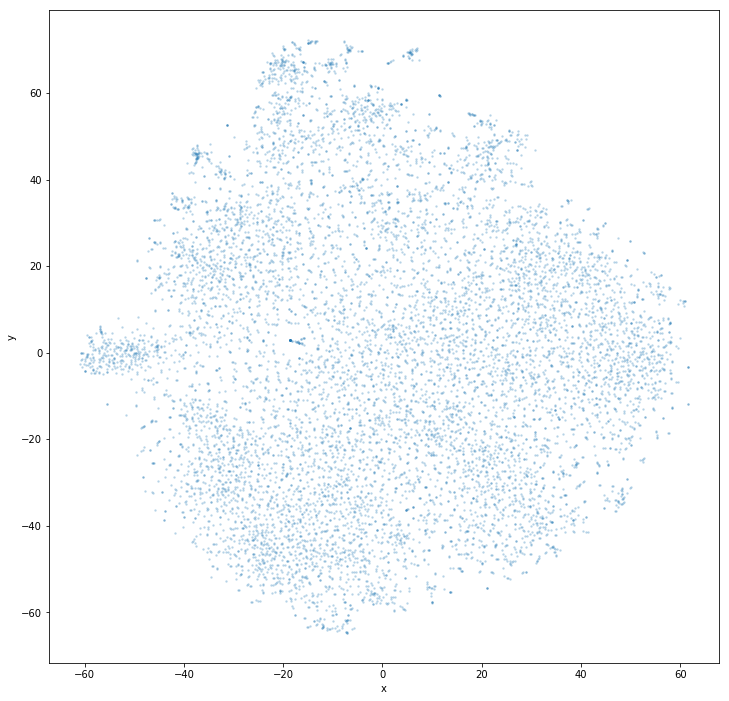

In [53]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)


In [54]:
output_notebook()
subset_df = coords_df.sample(n=5000)
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)
show(p)

Loading BokehJS ...

In [57]:
output_file('ScatterPlot_Bokeh.html')

In [58]:
show(p)